In [1]:
# 필요한 라이브러리 설치
!pip install nibabel matplotlib

Data shape: (181, 217, 181)


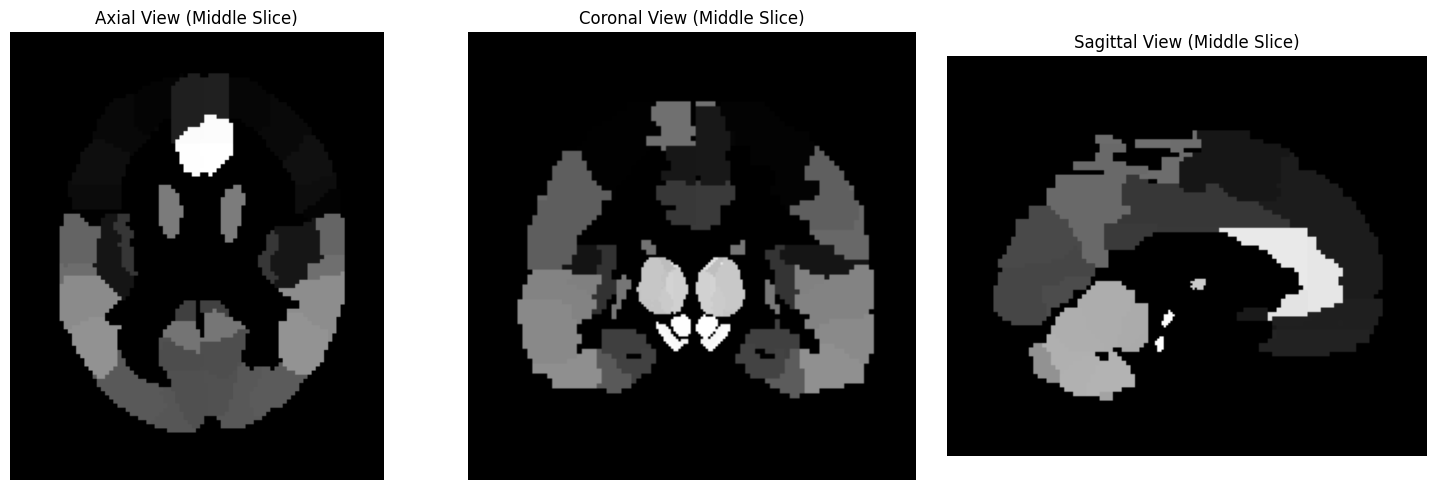

In [2]:
# 라이브러리 임포트
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# 파일 경로 지정
file_path = '/home/alpaco/msk/AFFIN/AAL3v1_1mm.nii'  # 코랩 환경에서 파일 업로드 후 경로를 지정하세요.

# NIfTI 파일 로드
img = nib.load(file_path)
data = img.get_fdata()

# 데이터 형태 출력
print(f"Data shape: {data.shape}")

# 중간 슬라이스 선택
mid_slice_axial = data[:, :, data.shape[2] // 2]
mid_slice_coronal = data[:, data.shape[1] // 2, :]
mid_slice_sagittal = data[data.shape[0] // 2, :, :]

# 시각화
plt.figure(figsize=(15, 5))

# Axial View
plt.subplot(1, 3, 1)
plt.imshow(mid_slice_axial.T, cmap="gray", origin="lower")
plt.title("Axial View (Middle Slice)")
plt.axis("off")

# Coronal View
plt.subplot(1, 3, 2)
plt.imshow(mid_slice_coronal.T, cmap="gray", origin="lower")
plt.title("Coronal View (Middle Slice)")
plt.axis("off")

# Sagittal View
plt.subplot(1, 3, 3)
plt.imshow(mid_slice_sagittal.T, cmap="gray", origin="lower")
plt.title("Sagittal View (Middle Slice)")
plt.axis("off")

plt.tight_layout()
plt.show()


In [3]:
# 라이브러리 임포트
import nibabel as nib

# 파일 경로 지정
file_path = '/home/alpaco/msk/BraTS2021_Data/BraTS2021_00033/BraTS2021_00033_flair.nii.gz'  # 코랩 환경에서 파일 업로드 후 경로를 지정하세요.

# NIfTI 파일 로드
img = nib.load(file_path)
data = img.get_fdata()

# 데이터 형태 출력
print(f"Data shape: {data.shape}")

Data shape: (240, 240, 155)


In [4]:
!pip install nibabel nilearn matplotlib

In [5]:
!pip install SimpleITK

In [6]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

# 파일 로드
fixed_image_path = '/home/alpaco/msk/BraTS2021_Data/BraTS2021_00033/BraTS2021_00033_flair.nii.gz'
moving_image_path = '/home/alpaco/msk/AFFIN/AAL3v1_1mm.nii'
prediction_output_path = '/home/alpaco/msk/Unet3D_2021_flair/tumor_prediction.nii'

fixed_image = sitk.ReadImage(fixed_image_path, sitk.sitkFloat32)
moving_image = sitk.ReadImage(moving_image_path, sitk.sitkFloat32)
prediction_image = sitk.ReadImage(prediction_output_path, sitk.sitkFloat32)

# 정렬 객체 설정
registration_method = sitk.ImageRegistrationMethod()

# Similarity Metric 설정 (Normalized Mutual Information 사용)
registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)

# Optimizer 설정
registration_method.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=100)
registration_method.SetOptimizerScalesFromPhysicalShift()

# Transform 초기값 설정
initial_transform = sitk.CenteredTransformInitializer(
    fixed_image,
    moving_image,
    sitk.AffineTransform(3),
    sitk.CenteredTransformInitializerFilter.GEOMETRY
)
registration_method.SetInitialTransform(initial_transform, inPlace=False)

# Multi-resolution 방식 적용
registration_method.SetShrinkFactorsPerLevel(shrinkFactors=[4, 2, 1])
registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[2, 1, 0])
registration_method.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()

# 정렬 수행
final_transform = registration_method.Execute(fixed_image, moving_image)

# 이동 이미지 변환 (AAL 데이터 리샘플링)
moving_resampled = sitk.Resample(
    moving_image,
    fixed_image,
    final_transform,
    sitk.sitkNearestNeighbor,  # 마스크 데이터이므로 Nearest Neighbor 사용
    0.0,
    moving_image.GetPixelID()
)

# NumPy 배열로 변환
fixed_np = sitk.GetArrayFromImage(fixed_image)
moving_np = sitk.GetArrayFromImage(moving_resampled)
prediction_np = sitk.GetArrayFromImage(prediction_image)


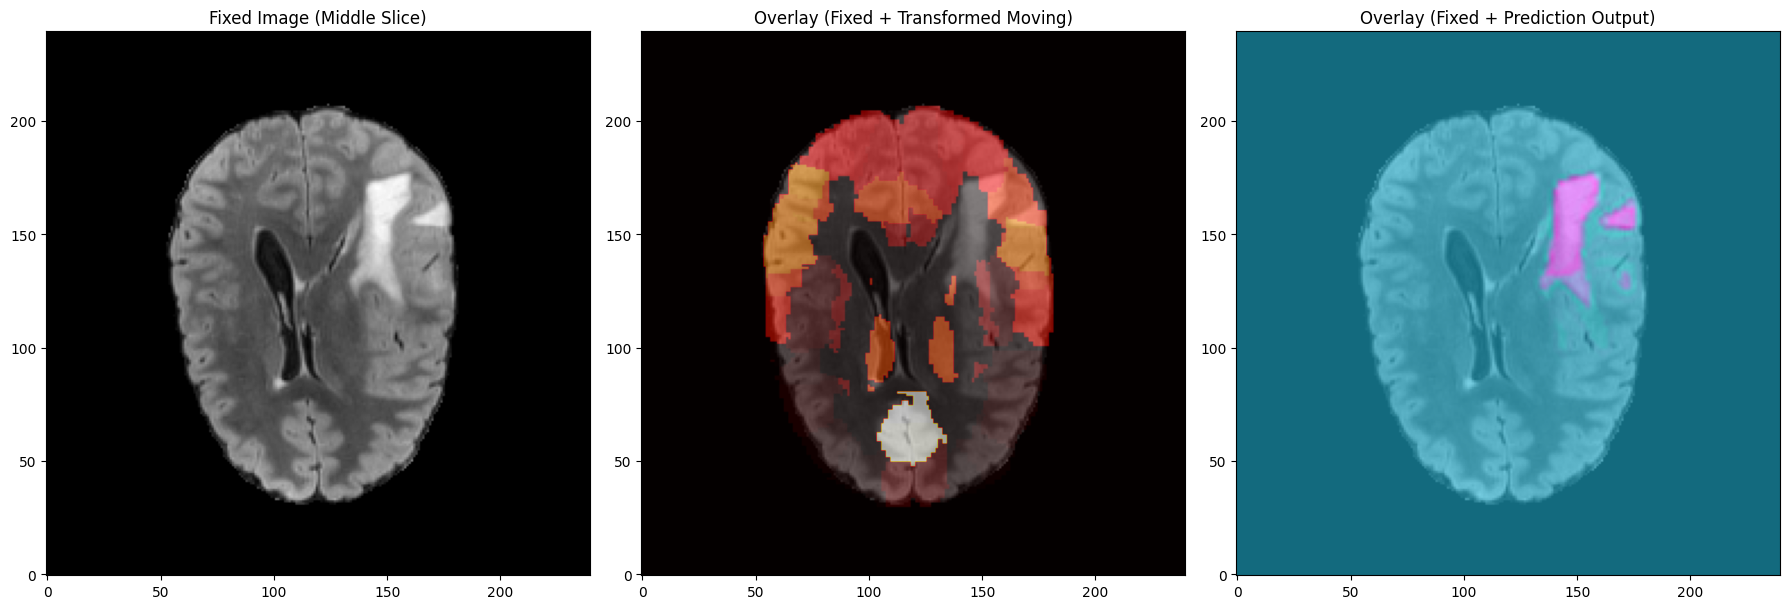

겹치는 voxel 수: 186764
겹치는 voxel 위치 (최대 10개 표시): 
[[ 20  99 146]
 [ 20  99 147]
 [ 20  99 148]
 [ 20  99 149]
 [ 20 100 144]
 [ 20 100 145]
 [ 20 100 146]
 [ 20 100 147]
 [ 20 100 148]
 [ 20 100 149]]
겹치는 마스크 번호: [  1.   5.   7.   9.  11.  13.  17.  18.  23.  25.  27.  29.  31.  33.
  37.  39.  40.  41.  43.  45.  47.  49.  51.  52.  53.  55.  57.  59.
  61.  63.  65.  67.  69.  71.  72.  75.  76.  77.  79.  83.  85.  87.
  89.  91.  93.  95.  99. 100. 101. 102. 103. 105. 113. 114. 115. 121.
 122. 123. 125. 126. 127. 128. 129. 131. 132. 133. 134. 135. 136. 137.
 138. 139. 141. 143. 145. 146. 147. 149. 151. 157. 158. 159. 160. 161.
 162. 163. 165. 166. 167. 169. 170.]
마스크 번호별 겹치는 voxel 수: {1.0: 1009, 5.0: 1, 7.0: 2774, 9.0: 2473, 11.0: 2026, 13.0: 5157, 17.0: 810, 18.0: 63, 23.0: 299, 25.0: 413, 27.0: 59, 29.0: 2069, 31.0: 213, 33.0: 9978, 37.0: 18, 39.0: 705, 40.0: 117, 41.0: 6146, 43.0: 5369, 45.0: 1452, 47.0: 3428, 49.0: 621, 51.0: 5802, 52.0: 254, 53.0: 508, 55.0: 7713, 57.0: 3706, 59.

In [ ]:

# 중간 슬라이스 시각화
slice_index_x = fixed_np.shape[0] // 2
slice_index_y = fixed_np.shape[1] // 2
slice_index_z = fixed_np.shape[2] // 2

#slice_index = 140
fixed_slice = fixed_np[slice_index_x, :, :]
moving_slice = moving_np[slice_index_x, :, :]
prediction_slice = prediction_np[slice_index_x, :, :]

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title("Fixed Image (Middle Slice)")
plt.imshow(fixed_slice, cmap='gray', origin='lower')

plt.subplot(1, 3, 2)
plt.title("Overlay (Fixed + Transformed Moving)")
plt.imshow(fixed_slice, cmap='gray', origin='lower')
plt.imshow(moving_slice, cmap='hot', alpha=0.5, origin='lower')

plt.subplot(1, 3, 3)
plt.title("Overlay (Fixed + Prediction Output)")
plt.imshow(fixed_slice, cmap='gray', origin='lower')
plt.imshow(prediction_slice, cmap='cool', alpha=0.5, origin='lower')

plt.tight_layout()
plt.show()

# 겹치는 부분 계산
aal_np = sitk.GetArrayFromImage(moving_resampled)
prediction_np = sitk.GetArrayFromImage(prediction_image)

overlap_mask = (aal_np > 0) & (prediction_np > 0)
overlap_indices = np.argwhere(overlap_mask)
overlap_labels = aal_np[overlap_mask]
unique_labels = np.unique(overlap_labels)  # 겹치는 마스크 번호

# 결과 출력
print(f"겹치는 voxel 수: {len(overlap_indices)}")
print(f"겹치는 voxel 위치 (최대 10개 표시): \n{overlap_indices[:10]}")
print(f"겹치는 마스크 번호: {unique_labels}")

# 마스크 번호별 겹치는 voxel 수 계산
label_counts = {label: np.sum(overlap_labels == label) for label in unique_labels}
print(f"마스크 번호별 겹치는 voxel 수: {label_counts}")

# 겹치는 영역 저장
overlap_image = sitk.GetImageFromArray(overlap_mask.astype(np.uint8))
overlap_image.CopyInformation(fixed_image)
sitk.WriteImage(overlap_image, "overlap_mask.nii")
print("겹치는 부분은 overlap_mask.nii로 저장되었습니다.")


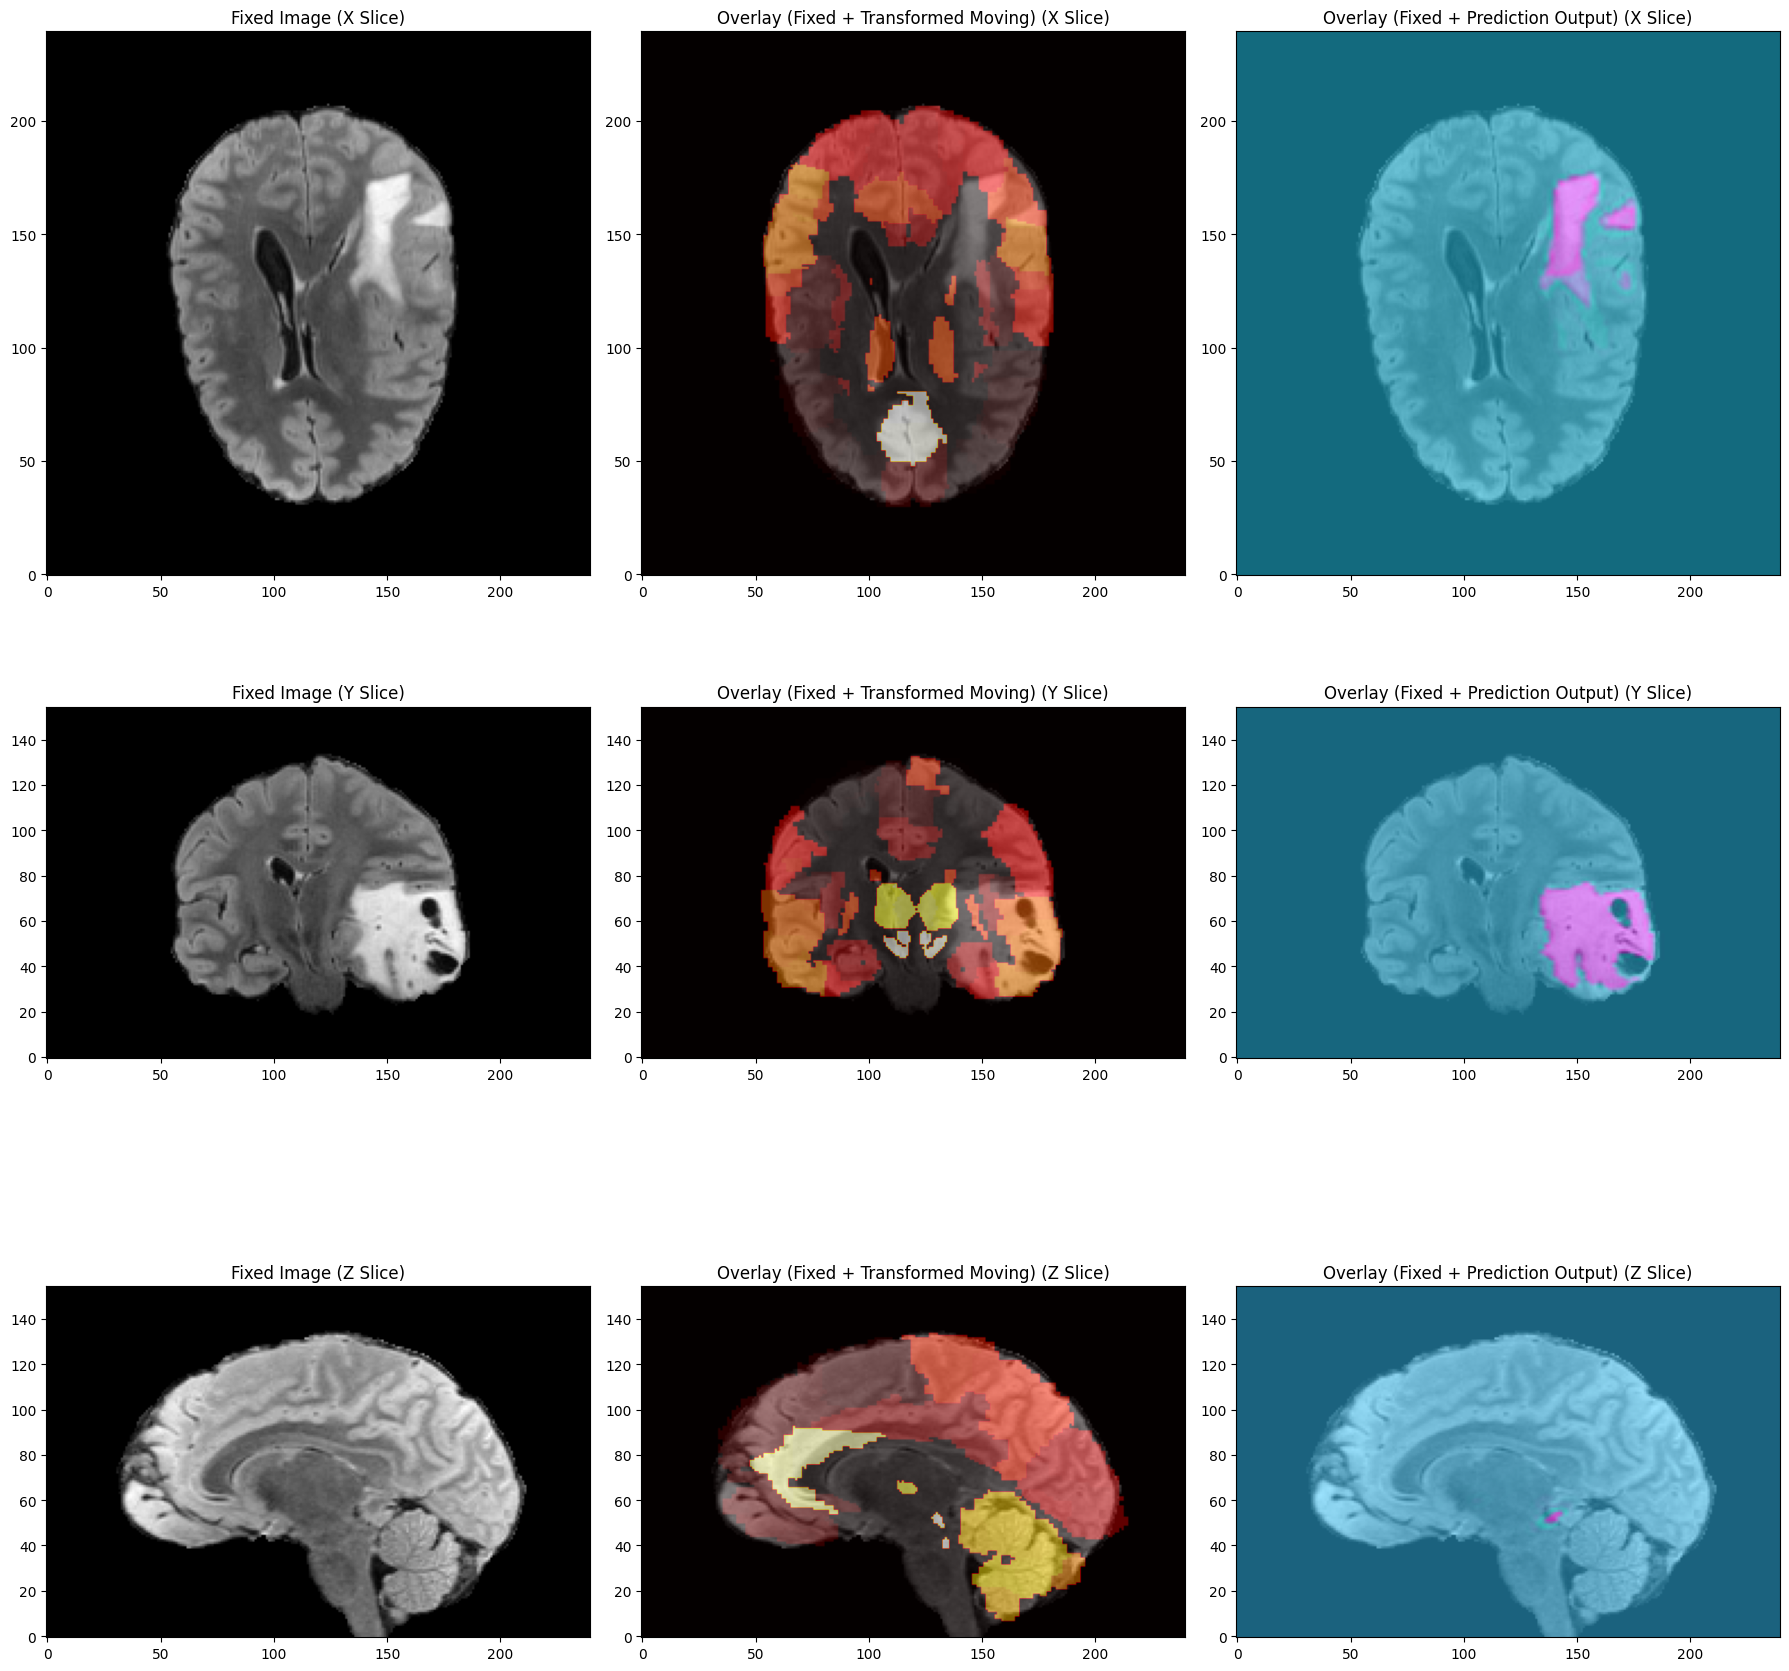

겹치는 voxel 수: 186764
겹치는 voxel 위치 (최대 10개 표시): 
[[ 20  99 146]
 [ 20  99 147]
 [ 20  99 148]
 [ 20  99 149]
 [ 20 100 144]
 [ 20 100 145]
 [ 20 100 146]
 [ 20 100 147]
 [ 20 100 148]
 [ 20 100 149]]
겹치는 마스크 번호: [  1.   5.   7.   9.  11.  13.  17.  18.  23.  25.  27.  29.  31.  33.
  37.  39.  40.  41.  43.  45.  47.  49.  51.  52.  53.  55.  57.  59.
  61.  63.  65.  67.  69.  71.  72.  75.  76.  77.  79.  83.  85.  87.
  89.  91.  93.  95.  99. 100. 101. 102. 103. 105. 113. 114. 115. 121.
 122. 123. 125. 126. 127. 128. 129. 131. 132. 133. 134. 135. 136. 137.
 138. 139. 141. 143. 145. 146. 147. 149. 151. 157. 158. 159. 160. 161.
 162. 163. 165. 166. 167. 169. 170.]
마스크 번호별 겹치는 voxel 수: {1.0: 1009, 5.0: 1, 7.0: 2774, 9.0: 2473, 11.0: 2026, 13.0: 5157, 17.0: 810, 18.0: 63, 23.0: 299, 25.0: 413, 27.0: 59, 29.0: 2069, 31.0: 213, 33.0: 9978, 37.0: 18, 39.0: 705, 40.0: 117, 41.0: 6146, 43.0: 5369, 45.0: 1452, 47.0: 3428, 49.0: 621, 51.0: 5802, 52.0: 254, 53.0: 508, 55.0: 7713, 57.0: 3706, 59.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk

# 중간 슬라이스 시각화
slice_index_x = fixed_np.shape[0] // 2
slice_index_y = fixed_np.shape[1] // 2
slice_index_z = fixed_np.shape[2] // 2

# 각 축의 슬라이스 추출
fixed_slice_x = fixed_np[slice_index_x, :, :]
moving_slice_x = moving_np[slice_index_x, :, :]
prediction_slice_x = prediction_np[slice_index_x, :, :]

fixed_slice_y = fixed_np[:, slice_index_y, :]
moving_slice_y = moving_np[:, slice_index_y, :]
prediction_slice_y = prediction_np[:, slice_index_y, :]

fixed_slice_z = fixed_np[:, :, slice_index_z]
moving_slice_z = moving_np[:, :, slice_index_z]
prediction_slice_z = prediction_np[:, :, slice_index_z]

# 시각화
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# X축 시각화
axes[0, 0].set_title("Fixed Image (X Slice)")
axes[0, 0].imshow(fixed_slice_x, cmap='gray', origin='lower')
axes[0, 1].set_title("Overlay (Fixed + Transformed Moving) (X Slice)")
axes[0, 1].imshow(fixed_slice_x, cmap='gray', origin='lower')
axes[0, 1].imshow(moving_slice_x, cmap='hot', alpha=0.5, origin='lower')
axes[0, 2].set_title("Overlay (Fixed + Prediction Output) (X Slice)")
axes[0, 2].imshow(fixed_slice_x, cmap='gray', origin='lower')
axes[0, 2].imshow(prediction_slice_x, cmap='cool', alpha=0.5, origin='lower')

# Y축 시각화
axes[1, 0].set_title("Fixed Image (Y Slice)")
axes[1, 0].imshow(fixed_slice_y, cmap='gray', origin='lower')
axes[1, 1].set_title("Overlay (Fixed + Transformed Moving) (Y Slice)")
axes[1, 1].imshow(fixed_slice_y, cmap='gray', origin='lower')
axes[1, 1].imshow(moving_slice_y, cmap='hot', alpha=0.5, origin='lower')
axes[1, 2].set_title("Overlay (Fixed + Prediction Output) (Y Slice)")
axes[1, 2].imshow(fixed_slice_y, cmap='gray', origin='lower')
axes[1, 2].imshow(prediction_slice_y, cmap='cool', alpha=0.5, origin='lower')

# Z축 시각화
axes[2, 0].set_title("Fixed Image (Z Slice)")
axes[2, 0].imshow(fixed_slice_z, cmap='gray', origin='lower')
axes[2, 1].set_title("Overlay (Fixed + Transformed Moving) (Z Slice)")
axes[2, 1].imshow(fixed_slice_z, cmap='gray', origin='lower')
axes[2, 1].imshow(moving_slice_z, cmap='hot', alpha=0.5, origin='lower')
axes[2, 2].set_title("Overlay (Fixed + Prediction Output) (Z Slice)")
axes[2, 2].imshow(fixed_slice_z, cmap='gray', origin='lower')
axes[2, 2].imshow(prediction_slice_z, cmap='cool', alpha=0.5, origin='lower')

plt.tight_layout()
plt.show()

# 겹치는 부분 계산
aal_np = sitk.GetArrayFromImage(moving_resampled)
prediction_np = sitk.GetArrayFromImage(prediction_image)

overlap_mask = (aal_np > 0) & (prediction_np > 0)
overlap_indices = np.argwhere(overlap_mask)
overlap_labels = aal_np[overlap_mask]
unique_labels = np.unique(overlap_labels)  # 겹치는 마스크 번호

# 결과 출력
print(f"겹치는 voxel 수: {len(overlap_indices)}")
print(f"겹치는 voxel 위치 (최대 10개 표시): \n{overlap_indices[:10]}")
print(f"겹치는 마스크 번호: {unique_labels}")

# 마스크 번호별 겹치는 voxel 수 계산
label_counts = {label: np.sum(overlap_labels == label) for label in unique_labels}
print(f"마스크 번호별 겹치는 voxel 수: {label_counts}")

# 겹치는 영역 저장
overlap_image = sitk.GetImageFromArray(overlap_mask.astype(np.uint8))
overlap_image.CopyInformation(fixed_image)
sitk.WriteImage(overlap_image, "overlap_mask.nii")
print("겹치는 부분은 overlap_mask.nii로 저장되었습니다.")


In [12]:
import numpy as np

# AAL3 텍스트 파일 읽기
label_mapping = {}
with open("/home/alpaco/msk/AFFIN/AAL3v1_1mm.nii.txt", "r") as file:
    for line in file:
        parts = line.strip().split(" ")
        label_id = int(parts[0])
        label_name = " ".join(parts[1:])
        label_mapping[label_id] = label_name

# 겹치는 마스크 번호 출력
print(f"겹치는 마스크 번호: {unique_labels}")

# 레이블 번호를 이름으로 변환하여 출력
print("겹치는 마스크 번호(이름으로):")
for label in unique_labels:
    label_name = label_mapping.get(label, "Unknown")  # 라벨 이름이 없으면 "Unknown"
    print(f"레이블 {label}: {label_name}")

# 마스크 번호별 겹치는 voxel 수 계산 및 출력
label_counts = {label: np.sum(overlap_labels == label) for label in unique_labels}
print(f"마스크 번호별 겹치는 voxel 수:")
for label, count in label_counts.items():
    label_name = label_mapping.get(label, "Unknown")  # 라벨 이름이 없으면 "Unknown"
    print(f"{label_name}: {count} Voxel")


겹치는 마스크 번호: [  1.   5.   7.   9.  11.  13.  17.  18.  23.  25.  27.  29.  31.  33.
  37.  39.  40.  41.  43.  45.  47.  49.  51.  52.  53.  55.  57.  59.
  61.  63.  65.  67.  69.  71.  72.  75.  76.  77.  79.  83.  85.  87.
  89.  91.  93.  95.  99. 100. 101. 102. 103. 105. 113. 114. 115. 121.
 122. 123. 125. 126. 127. 128. 129. 131. 132. 133. 134. 135. 136. 137.
 138. 139. 141. 143. 145. 146. 147. 149. 151. 157. 158. 159. 160. 161.
 162. 163. 165. 166. 167. 169. 170.]
겹치는 마스크 번호(이름으로):
레이블 1.0: Precentral_L 1
레이블 5.0: Frontal_Mid_2_L 5
레이블 7.0: Frontal_Inf_Oper_L 7
레이블 9.0: Frontal_Inf_Tri_L 9
레이블 11.0: Frontal_Inf_Orb_2_L 11
레이블 13.0: Rolandic_Oper_L 13
레이블 17.0: Olfactory_L 17
레이블 18.0: Olfactory_R 18
레이블 23.0: Rectus_L 23
레이블 25.0: OFCmed_L 25
레이블 27.0: OFCant_L 27
레이블 29.0: OFCpost_L 29
레이블 31.0: OFClat_L 31
레이블 33.0: Insula_L 33
레이블 37.0: Cingulate_Mid_L 37
레이블 39.0: Cingulate_Post_L 39
레이블 40.0: Cingulate_Post_R 40
레이블 41.0: Hippocampus_L 41
레이블 43.0: ParaHippocampal_L 43
레이블 4

In [13]:
# Predict output의 양성 voxel 수 계산
total_prediction_voxels = np.sum(prediction_np > 0)

# Fixed image의 양성 voxel 수 계산
total_fixed_voxels = np.sum(fixed_np > 0)

# Predict output이 Fixed image 대비 몇 퍼센트인지 계산
if total_fixed_voxels > 0:
    predict_vs_fixed_ratio = total_prediction_voxels / total_fixed_voxels * 100
else:
    predict_vs_fixed_ratio = 0

# Fixed image의 voxel 크기 확인 (spacing)
spacing = fixed_image.GetSpacing()  # x, y, z 방향 크기 (단위: mm)
voxel_volume_mm3 = spacing[0] * spacing[1] * spacing[2]  # voxel의 부피 (mm³)

# 양성 voxel의 총 부피 (mm³) -> m³로 변환
total_fixed_volume_m3 = total_fixed_voxels * voxel_volume_mm3 * 1e-9  # mm³ -> m³로 변환

# 결과 출력
print(f"Predict output의 양성 voxel 수 (size): {total_prediction_voxels}")
print(f"Fixed image의 양성 voxel 수 (size): {total_fixed_voxels}")
print(f"Predict output이 Fixed image 대비 {predict_vs_fixed_ratio:.2f}% 크기를 가집니다.")
print(f"Fixed image의 양성 voxel 총 부피: {total_fixed_volume_m3:.6f} m³")

Predict output의 양성 voxel 수 (size): 304686
Fixed image의 양성 voxel 수 (size): 1504647
Predict output이 Fixed image 대비 20.25% 크기를 가집니다.
Fixed image의 양성 voxel 총 부피: 0.001505 m³


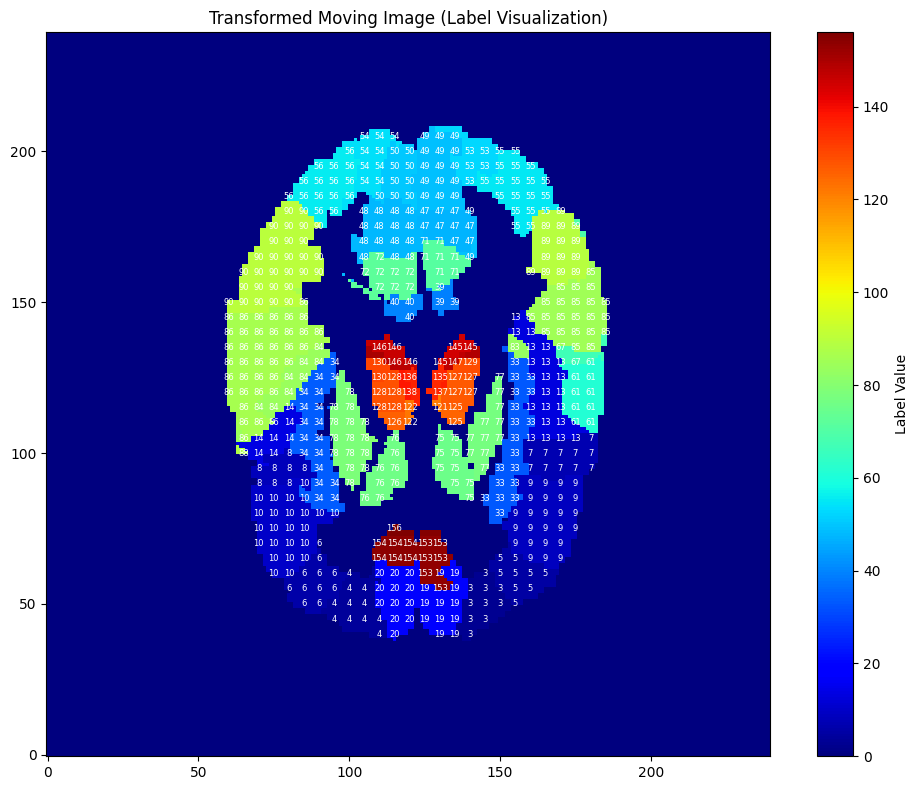

In [10]:
# 중간 슬라이스 시각화 (라벨 숫자 표시)
plt.figure(figsize=(10, 8))
plt.title("Transformed Moving Image (Label Visualization)")
plt.imshow(moving_slice, cmap='jet', origin='lower')  # 'jet' colormap 사용

# 픽셀 값(라벨) 표시
for i in range(0, moving_slice.shape[0], 5):  # 세로 방향 간격 5로 조정
    for j in range(0, moving_slice.shape[1], 5):  # 가로 방향 간격 5로 조정
        label = int(moving_slice[i, j])
        if label > 0:  # 라벨이 0보다 큰 경우만 표시
            plt.text(j, i, str(label), color="white", fontsize=6, ha='center', va='center')

plt.colorbar(label="Label Value")
plt.tight_layout()
plt.show()


In [11]:
np.unique(moving_slice)

array([  0.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  13.,  14.,
        19.,  20.,  33.,  34.,  39.,  40.,  47.,  48.,  49.,  50.,  53.,
        54.,  55.,  56.,  61.,  67.,  69.,  71.,  72.,  75.,  76.,  77.,
        78.,  80.,  83.,  84.,  85.,  86.,  88.,  89.,  90., 121., 122.,
       125., 126., 127., 128., 129., 130., 135., 136., 137., 138., 145.,
       146., 147., 148., 149., 150., 153., 154., 155., 156.],
      dtype=float32)

In [12]:
np.unique(moving_np)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,
        46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,
        57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,
        68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,
        79.,  80.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,
        92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102.,
       103., 104., 105., 106., 107., 108., 109., 110., 111., 112., 113.,
       114., 115., 116., 117., 118., 119., 120., 121., 122., 123., 124.,
       125., 126., 127., 128., 129., 130., 131., 132., 133., 134., 135.,
       136., 137., 138., 139., 140., 141., 142., 143., 144., 145., 146.,
       147., 148., 149., 150., 151., 152., 153., 15